<a href="https://colab.research.google.com/github/hyeokjun0804/HJ_BigData_Maketing_Course/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B0%B8%EB%9F%B0%EC%8B%B1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#train과 test를 나눠줌
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv", encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#데이터 지정(변수)
X= df.drop(["고객ID", "성별"], axis = 1)
Y = df["성별"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#일변량 통계기반 변수 선택
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
0,12.171897,0.000516,True,이탈여부
1,1.762308,0.184771,True,총매출액
4,0.885780,0.346949,True,1회 평균매출액
7,1.845251,0.174776,True,고객등급
8,1.259044,0.262218,True,구매유형
11,0.910350,0.340352,True,거주지역
12,2.110759,0.146716,True,고객 나이대
13,2.238886,0.135030,True,거래기간
14,5.028139,0.025252,True,할인민감여부
18,1.079088,0.299261,True,평균 구매주기


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#일변량 통계기반 변수 선택
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")
#n_estimators: 트리 갯수, random_state: 시작점,  threshold: 기준점

selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
1,총매출액,True
3,방문빈도,True
4,1회 평균매출액,True
5,할인권 사용 횟수,True
6,총 할인 금액,True
10,구매카테고리수,True
11,거주지역,True
13,거래기간,True
17,Monetary,True
18,평균 구매주기,True


In [ ]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_under))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 135, 1: 135})


In [ ]:
#오버 샘플링
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_over))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 565, 1: 565})


In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df["1회 평균매출액"].describe()

count    1.000000e+03
mean     3.521024e+05
std      3.124636e+05
min      2.708200e+04
25%      1.631242e+05
50%      2.582080e+05
75%      4.268310e+05
max      2.798500e+06
Name: 1회 평균매출액, dtype: float64

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


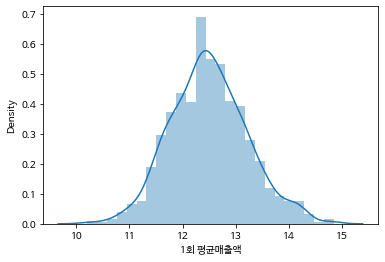

In [ ]:
df["1회 평균매출액"] = np.log1p(df["1회 평균매출액"])

sns.distplot(df["1회 평균매출액"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num=['총매출액', '할인권 사용 횟수', '총 할인 금액', '구매카테고리수', 'Frequency', 'Monetary','평균 구매주기']
cg = ['구매금액대', '고객등급', '구매유형', '클레임접수여부', '거주지역', '고객 나이대','이탈여부']

X = df[df.성별 ==0][num+cg] #독립변수
Y = df[df.성별 ==0]["1회 평균매출액"] #종속변수

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.34611594  0.36755538  0.65476588  1.72119076  0.4576369   1.21328558
 -0.07071402  1.          0.          0.          1.          0.
  0.          1.          0.          0.          1.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          1.        ]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train) #선형회귀

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("train R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse)) #Root Mean Square Error: 0에 가까울 수록 정확도가 높음

predict value
 [11.4238009  12.68462167 12.0583051  11.88348314 12.31159057 12.20437463
 11.95779941 12.42664739 11.8468198  12.31276676 12.10118749 12.25790091
 12.0188279  12.39986835 12.09459747 12.18295315 12.40893026 12.7840216
 12.68947674 12.10360971 12.90379853 12.12952447 13.80676215 13.12521976
 13.35235681 12.70588697 12.10590478 12.06948558 12.44653663 11.83191429
 12.10145804 11.45407767 12.39841422 12.73787605 13.18508913 14.17162912
 11.77486698 11.80795281 11.94810891 11.78735451 12.74031835 13.00063821
 11.8399962  13.42223768 12.76640428 12.6351471  12.40220833 12.85780713
 11.29723931 12.91075504 12.96677831 12.40927402 12.97157    12.672356
 12.15264749 12.74553855 12.38755047 11.27822832 12.34360115 11.63550436
 14.24998944 11.80282235 12.68443619 11.7098595  12.25579804 13.12411044
 12.44819328 12.25073364 12.15925546 12.9423316  12.76450087 12.47319293
 14.0627256  12.95493288 13.02550053 12.94833784 12.06704558 11.86892653
 12.13408055 12.32108103 13.90982634 12

In [ ]:
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 12.688
가중치(beta) [ 0.272  0.011  0.013  0.029 -0.301 -0.008  0.439 -0.369  0.035  0.334
 -0.025  0.025  0.017 -0.003  0.013 -0.027 -0.007  0.007  0.468 -0.165
 -0.126 -0.054 -0.07  -0.076  0.023  0.095 -0.044  0.055 -0.031 -0.024
 -0.052 -0.104  0.104]


In [ ]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index() #인덱스 리셋하기/안해주면 인덱스 값이 엉망진창임
Y_test_df = pd.DataFrame(Y_test_df["1회 평균매출액"])
Y_test_df

,1회 평균매출액
0,10.795752
1,12.341591
2,12.509475
3,11.823156
4,12.897739
...,...
239,13.651062
240,12.334079
241,11.696546
242,12.625572


In [ ]:
Y_pred_df = pd.DataFrame(Y_pred)
Y_pred_df

,0
0,11.423801
1,12.684622
2,12.058305
3,11.883483
4,12.311591
...,...
239,14.207389
240,12.541102
241,11.894947
242,12.798480


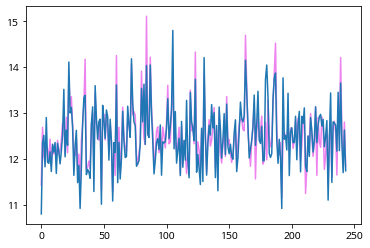

In [ ]:
%matplotlib inline
plt.plot(Y_pred_df, color='violet')
plt.plot(Y_test_df)

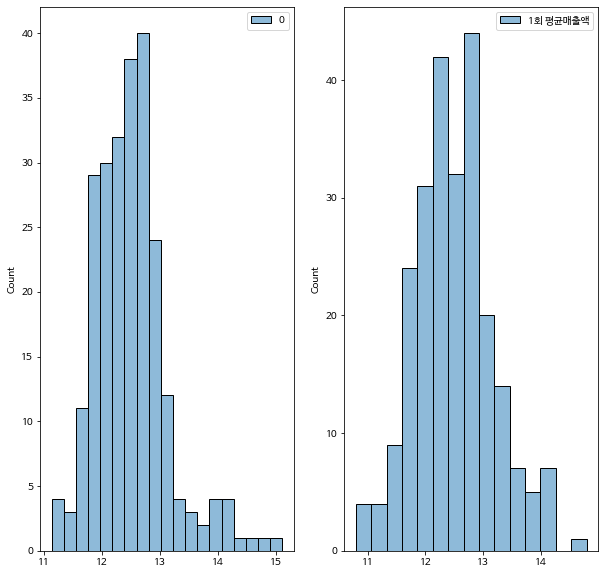

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,10))
sns.histplot(Y_pred_df, ax=ax[0])
sns.histplot(Y_test_df, ax=ax[1])